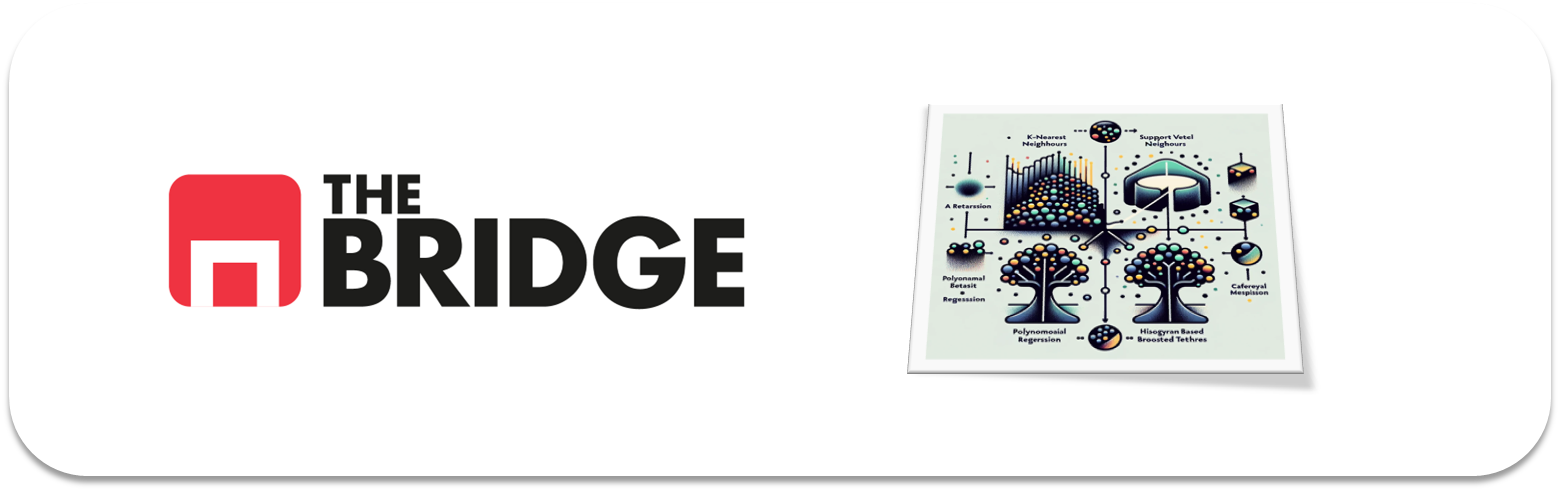

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [3]:
# Cargar dataset
df = pd.read_csv("./data/wines_dataset.csv", sep="|")

# Mostrar primeras filas
print("Primeras filas del dataset:")
df.head()


Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [4]:
# Información general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


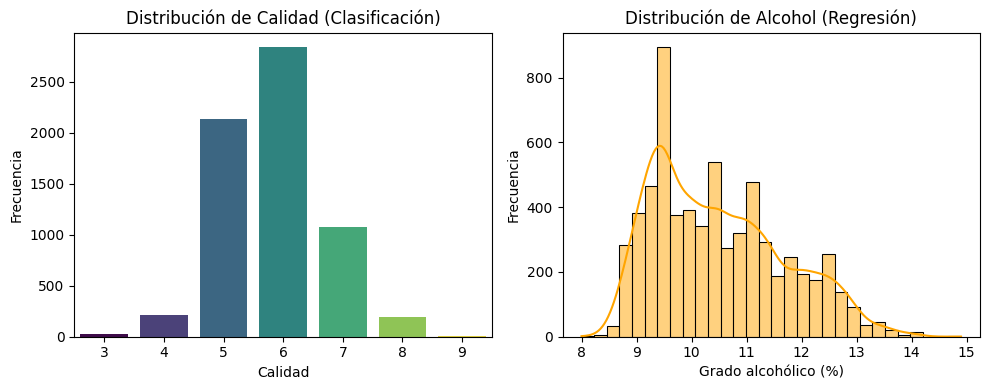

In [5]:
# Definir variables target
target_clasificacion = "quality"
target_regresion = "alcohol"

# Visualización de distribución
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(data=df, x=target_clasificacion, hue=target_clasificacion, palette="viridis", legend=False)
plt.title("Distribución de Calidad (Clasificación)")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")

plt.subplot(1,2,2)
sns.histplot(data=df, x=target_regresion, bins=30, kde=True, color='orange')
plt.title("Distribución de Alcohol (Regresión)")
plt.xlabel("Grado alcohólico (%)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## Assessment previo

### Clasificación target: `quality`

**Objetivo del negocio:** Predecir la calidad del vino para anticipar la clasificación por parte de catadores profesionales y planificar mejor la producción, distribución y precios.

**Aspectos clave:**
- Es probable que exista **desbalanceo** entre clases (más vinos con calidad 5 o 6 que con 3 u 8).
- El cliente indica que le interesa **clasificar bien en media**, lo que interpretamos como **optimizar el recall**.
- Usar técnicas como `class_weight='balanced'`, oversampling o SMOTE para mejorar el rendimiento en clases minoritarias.

---

### Regresión target: `alcohol`

**Objetivo del negocio:** Estimar el grado alcohólico del vino para simular variantes futuras según características fisicoquímicas y atender a diferentes mercados.

**Aspectos clave:**
- El rango de valores de alcohol está acotado (entre 8% y 14%).
- El cliente desea minimizar el **error porcentual**.
- Es conveniente analizar si existen outliers y cómo es la **relación entre alcohol y otras variables**.
- Si hay mucha correlación entre algunas variables y el alcohol, modelos simples pueden funcionar bien.



### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [6]:
# Separación de features y target
X = df.drop(columns=['quality', 'class'])
y = df['quality']

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Definición de función para evaluar recall medio
def evaluar_modelo(modelo, X_train, y_train):
    recall = cross_val_score(modelo, X_train, y_train, cv=5, scoring='recall_macro')
    return recall.mean()

In [8]:
# Modelos a evaluar
modelos = {
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=7)': KNeighborsClassifier(n_neighbors=7),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Evaluación inicial
resultados = {nombre: evaluar_modelo(modelo, X_train, y_train) for nombre, modelo in modelos.items()}
resultados


c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification

{'KNN (k=3)': np.float64(0.2985537604977181),
 'KNN (k=7)': np.float64(0.2743066210472864),
 'Random Forest': np.float64(0.3625142260796802),
 'Gradient Boosting': np.float64(0.2932088861841304),
 'Logistic Regression': np.float64(0.2388254154328711)}

In [9]:
def agrupar_calidad(valor):
    if valor <= 5:
        return 'baja'
    elif valor == 6:
        return 'media'
    else:
        return 'alta'

df['quality_group'] = df['quality'].apply(agrupar_calidad)

In [12]:
# 1. Definir X e y (con la nueva variable agrupada)
X = df.drop(['quality', 'quality_group', 'class'], axis=1)  # Quitamos columnas no numéricas y target original
y = df['quality_group']

# 2. Dividir en train/test (stratify para mantener proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Escalar variables (muy importante para KNN y regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# 4. Definir función para evaluar modelos usando validación cruzada y recall medio
def evaluar_modelo(modelo, X, y):
    recall = cross_val_score(modelo, X, y, cv=5, scoring='recall_macro').mean()
    return recall

# 5. Definir modelos para evaluar
modelos = {
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=7)': KNeighborsClassifier(n_neighbors=7),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}


In [15]:

# 6. Evaluar modelos (usar X_train_scaled para los que requieren escala)
resultados = {}
for nombre, modelo in modelos.items():
    if 'KNN' in nombre or 'Logistic Regression' in nombre:
        score = evaluar_modelo(modelo, X_train_scaled, y_train)
    else:
        score = evaluar_modelo(modelo, X_train, y_train)
    resultados[nombre] = score

resultados

{'KNN (k=3)': np.float64(0.6044235164782691),
 'KNN (k=7)': np.float64(0.5935292243347003),
 'Random Forest': np.float64(0.6809696674650673),
 'Gradient Boosting': np.float64(0.5943521699992482),
 'Logistic Regression': np.float64(0.5313388914481423)}

In [16]:
# Grid de hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearch con scoring por recall macro
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='recall_macro', cv=3)
grid_rf.fit(X_train, y_train)

print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejor recall macro CV:", grid_rf.best_score_)


Mejores parámetros Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Mejor recall macro CV: 0.6704318483359425


In [17]:
# Entrenar el modelo con los mejores parámetros
mejor_rf = grid_rf.best_estimator_
mejor_rf.fit(X_train, y_train)

# Predecir en el conjunto de test
y_pred = mejor_rf.predict(X_test)

# Evaluar con recall macro y otras métricas
from sklearn.metrics import recall_score, classification_report, confusion_matrix

recall_test = recall_score(y_test, y_pred, average='macro')
print(f"Recall macro en test: {recall_test:.4f}")

print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Recall macro en test: 0.6863
Informe de clasificación:
              precision    recall  f1-score   support

        alta       0.78      0.57      0.66       256
        baja       0.76      0.73      0.75       477
       media       0.65      0.75      0.70       567

    accuracy                           0.71      1300
   macro avg       0.73      0.69      0.70      1300
weighted avg       0.72      0.71      0.71      1300

Matriz de confusión:
[[147   5 104]
 [  5 349 123]
 [ 36 104 427]]


In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Antes de aplicar SMOTE, muestra el balance actual
print("Distribución antes de SMOTE:", Counter(y_train))

# Creamos SMOTE (para multiclase no hace falta nada especial)
smote = SMOTE(random_state=42)

# Aplicamos SMOTE solo a los datos de entrenamiento
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:", Counter(y_train_bal))

# Escalar si el modelo lo necesita
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)  # suponiendo que tienes X_test

# Entrena de nuevo con el dataset balanceado y escalado para los modelos que lo necesiten
model_rf = RandomForestClassifier(random_state=42, **grid_rf.best_params_)  # usando mejores params

# Ejemplo de entrenamiento con datos balanceados
model_rf.fit(X_train_bal, y_train_bal)

# Evaluar en test
from sklearn.metrics import classification_report, recall_score, confusion_matrix

y_pred = model_rf.predict(X_test)
print("Recall macro en test (balanceado):", recall_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Distribución antes de SMOTE: Counter({'media': 2269, 'baja': 1907, 'alta': 1021})
Distribución después de SMOTE: Counter({'media': 2269, 'baja': 2269, 'alta': 2269})
Recall macro en test (balanceado): 0.7171893284887912
              precision    recall  f1-score   support

        alta       0.68      0.71      0.69       256
        baja       0.75      0.77      0.76       477
       media       0.70      0.66      0.68       567

    accuracy                           0.71      1300
   macro avg       0.71      0.72      0.71      1300
weighted avg       0.71      0.71      0.71      1300

Matriz de confusión:
 [[183   7  66]
 [ 14 369  94]
 [ 74 117 376]]


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [21]:
# Copiar df para regresión
df_reg = df.copy()

# One-hot encoding para 'class'
df_reg = pd.get_dummies(df_reg, columns=['class'], drop_first=True)  
# Esto crea una columna 'class_white' si las clases son 'red' y 'white', por ejemplo

# Variables predictoras (quitamos 'alcohol' y 'quality_group' si no queremos usarla)
X = df_reg.drop(columns=['alcohol', 'quality_group'])  

# Añadir 'quality' como predictor (puedes usar 'quality_group' si prefieres)
X['quality'] = df_reg['quality']
y = df_reg['alcohol']

In [27]:
# Dividir train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modelos a probar
modelos = {
    'Regresión Lineal': Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Función para evaluar con cross-validation usando RMSE
def evaluar_modelo_cv(modelo, X, y, cv=5):
    scores = cross_val_score(modelo, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    return -np.mean(scores)

# Evaluar modelos
resultados = {}
for nombre, modelo in modelos.items():
    rmse = evaluar_modelo_cv(modelo, X_train, y_train)
    resultados[nombre] = rmse

print("RMSE promedio en validación cruzada:")
resultados

RMSE promedio en validación cruzada:


{'Regresión Lineal': np.float64(0.512266868820273),
 'Random Forest': np.float64(0.4083982091026909),
 'Gradient Boosting': np.float64(0.4721596365184723)}

In [30]:
# Entrenar
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Predecir
y_pred = best_model.predict(X_test)

# Evaluar (sin usar squared, calculamos RMSE manualmente)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred)

print(f"RMSE en test: {rmse_test:.4f}")
print(f"MAE en test: {mae_test:.4f}")

RMSE en test: 0.4077
MAE en test: 0.2729


In [31]:
# --- Optimización de hiperparámetros para Random Forest ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [32]:
# --- Entrenar el modelo con los mejores hiperparámetros ---
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# --- Predicción y evaluación en test ---
y_pred = best_rf.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred)

print(f"RMSE en test: {rmse_test:.4f}")
print(f"MAE en test: {mae_test:.4f}")


RMSE en test: 0.4053
MAE en test: 0.2725


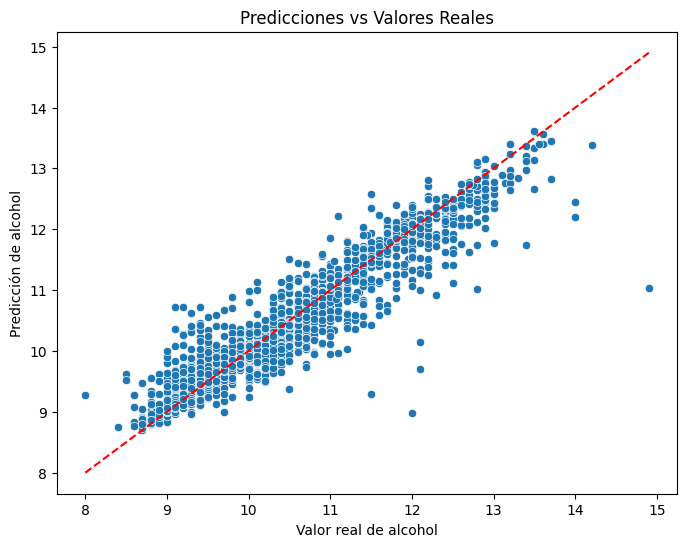

In [33]:
# --- Gráfico: Predicciones vs valores reales ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor real de alcohol')
plt.ylabel('Predicción de alcohol')
plt.title('Predicciones vs Valores Reales')
plt.show()

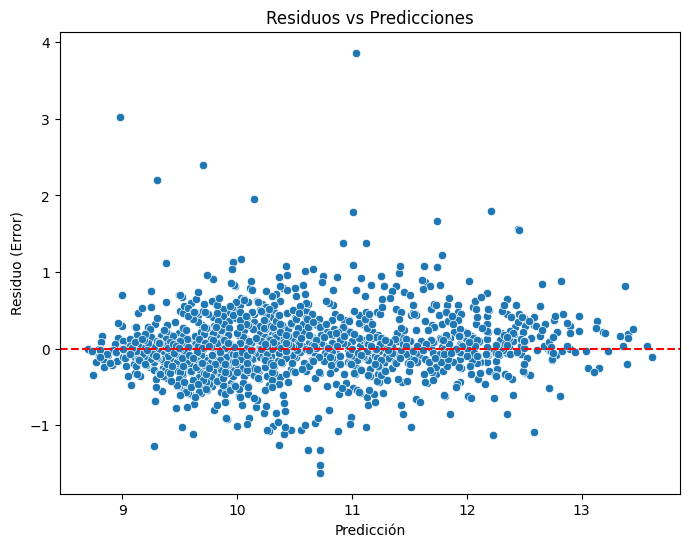

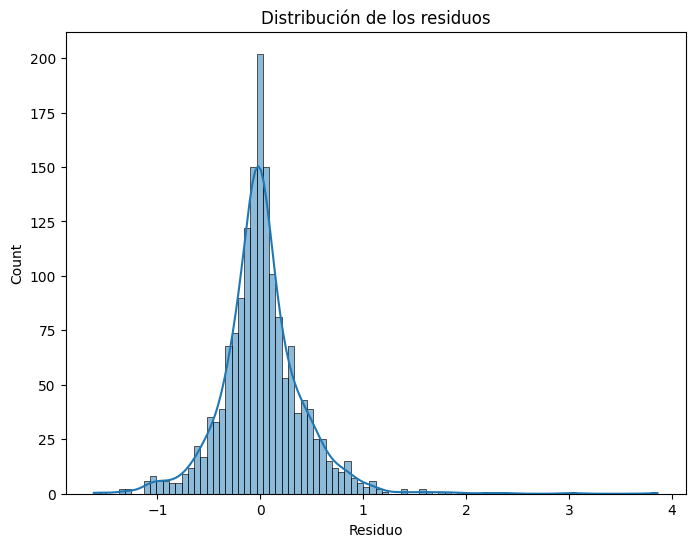

In [34]:
# --- Análisis de residuos ---
residuos = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicción')
plt.ylabel('Residuo (Error)')
plt.title('Residuos vs Predicciones')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuo')
plt.title('Distribución de los residuos')
plt.show()